In [1]:
from translator import rdf_to_puml

# input_rdf = "sample/object-graph-1.rdf"
input_rdf = "sample/MNIST-3model.rdf"
ontologies = ["sample/MLLO.rdf"]

result = rdf_to_puml(input_rdf, ontologies ,save_puml = False, layout_type="bipartite", visualize=0)
print(result)




@startuml
!include https://raw.githubusercontent.com/iofoundry/ontopuml/main/iof.iuml
left to right direction
class(c1, RawDataSet)
class(c2, PoissonNoise)
class(c3, GaussianNoise)
class(c4, DataReshapingOperation)
class(c5, owl#Thing)
class(c6, DataProcessingAlgorithm)
class(c7, FeatureScalingOperation)
class(c8, FeatureScalingAlgorithm)
class(c9, TestDataSet)
class(c10, MachineLearningDataPreparationPipeline)
class(c11, ModelExecution)
class(c12, TypeCastingOperation)
class(c13, LogisticRegression)
class(c14, ModelOutputDataSet)
class(c15, ModelPerformanceResult)
class(c16, ConvolutionalNeuralNetwork)
class(c17, MultiLayerPerceptron)
class(c18, ModelEvaluation)
class(c19, ClassificationAccuracy)
class(c20, ClassificationObjective)
class(c21, SupervisedLearning)
class(c22, Backpropagation)
class(c23, BatchSize)
class(c24, EpochNumber)
individual(i1, ns1:MnistG48P)
individual(i2, ns1:DatasetCharacteristic6)
individual(i3, ns1:DatasetCharacteristic7)
individual(i4, ns1:DataReshapingOper

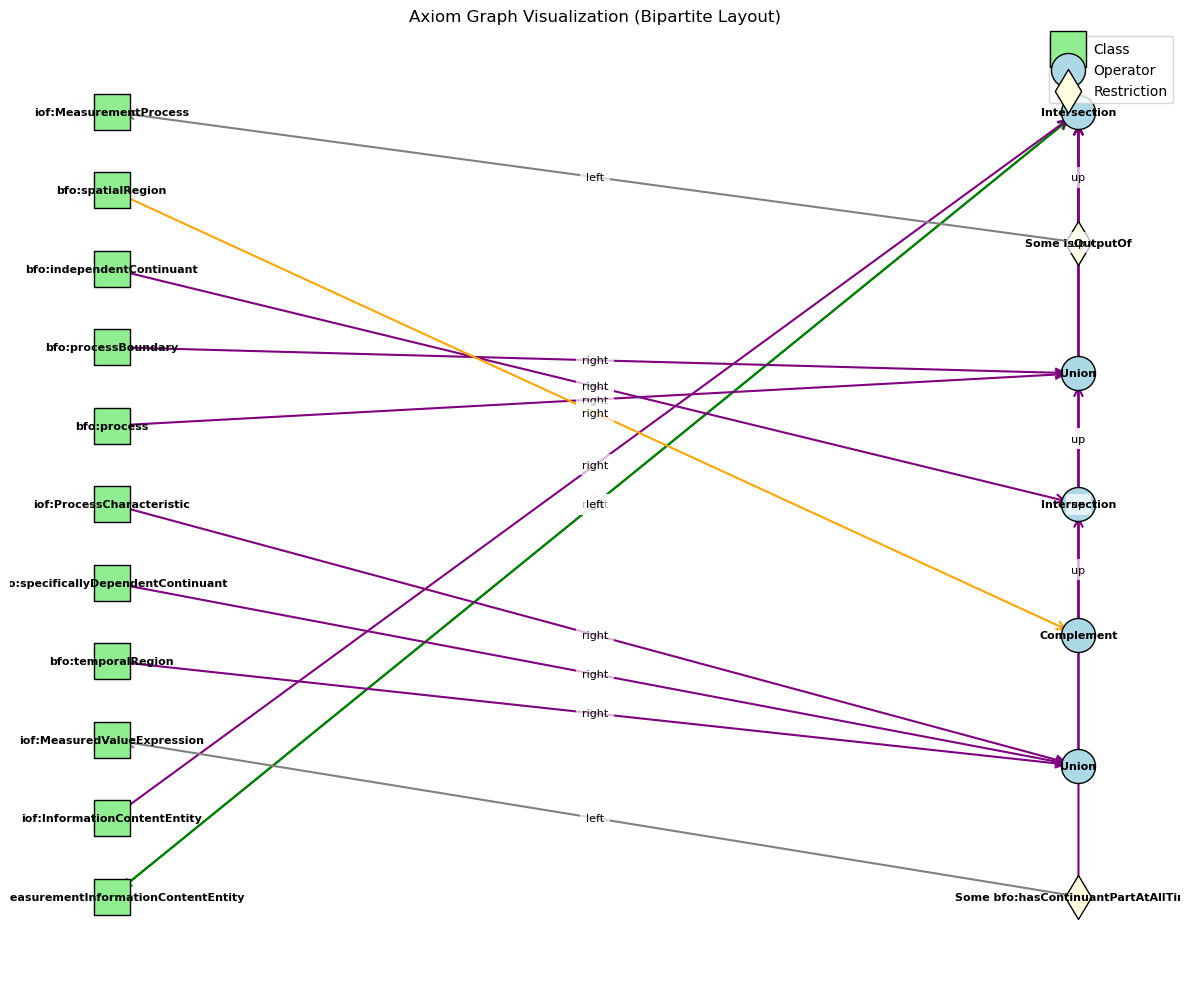

@startuml
!include https://raw.githubusercontent.com/iofoundry/ontopuml/main/iof.iuml
left to right direction
class(c1, iof:MeasurementInformationContentEntity)
class(c2, iof:InformationContentEntity)
class(c3, iof:MeasuredValueExpression)
some(ce4, bfo:hasContinuantPartAtAllTimes, c3, left)
class(c5, bfo:temporalRegion)
class(c6, bfo:specificallyDependentContinuant)
class(c7, iof:ProcessCharacteristic)
union(ce8, '["c5", "c6", "c7"]')
class(c9, bfo:process)
class(c10, bfo:processBoundary)
class(c11, bfo:independentContinuant)
class(c12, bfo:spatialRegion)
complement(ce13, "c12")
intersection(ce14, '["c11", "ce13"]')
union(ce15, '["c9", "c10", "ce14"]')
class(c16, iof:MeasurementProcess)
some(ce17, isOutputOf, c16, left)
intersection(ce18, '["c2", "ce4", "ce8", "ce15", "ce17"]')
equivalent(c1, ce18, right)
@enduml


In [2]:
from owlready2 import get_ontology
from translator import axiom_to_puml
# Example Usage: [ProcuringBusinessProcess,MaterialArtifact,ValueExpression, PieceOfEquipment], [MeasurementInformationContentEntity]
input = "MeasurementInformationContentEntity"
iofonto = get_ontology("sample/Core.rdf").load()
axiom_result = axiom_to_puml(input, iofonto, save_puml = False, type = 1, visualize=1, layout_type='bipartite')
print(axiom_result)

In [19]:
from translator import axiom2puml

entity = iofonto[input]
print(axiom2puml.get_axiom(input, iofonto, 2))

print('eq',iofonto[input].equivalent_to[0])

gcas = list(iofonto.general_class_axioms())
for gca in gcas:
    if gca.is_a[0] == getattr(iofonto, input):
        print('gca',gca.left_side)
    else:
        pass
# sub_class            
print(iofonto[input].is_a[0])
# disjoints
print(iofonto[input].disjoints())



None
eq Core.InformationContentEntity & obo.BFO_0000110.some(Core.MeasuredValueExpression) & Core.describes.some(obo.BFO_0000008 | obo.BFO_0000020 | Core.ProcessCharacteristic) & Core.isAbout.some(obo.BFO_0000015 | obo.BFO_0000035 | (obo.BFO_0000004 & Not(obo.BFO_0000006))) & Core.isOutputOf.some(Core.MeasurementProcess)
Core.InformationContentEntity
<generator object EntityClass.disjoints at 0x121b5a900>


# test command
- python translator/__init__.py -i sample/object-graph-2.rdf -c --condition-included ns -l kamada_kawai
